#Directory, Libraries and Data

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest


In [2]:
#Libraries 
import numpy as np
import pandas as pd

In [3]:
#load the data
df = pd.read_csv("CreditCard.csv")
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#Data Preparation

In [4]:
#Transform objects into numerical variables
df = pd.get_dummies(data = df,
                    drop_first = True)
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,1,0,0


In [5]:
#Summary Statistics
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967,0.775588,0.440485,0.068992
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812,0.417353,0.496634,0.253536
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000,1.000000,0.000000,0.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000,1.000000,1.000000,0.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000,1.000000,1.000000,1.000000


In [6]:
#isolate X and y
y = df.card_yes
X = df.drop(columns = "card_yes")
X.head(1)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.03327,124.9833,3,54,1,12,1,0


In [7]:
#Training and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502,
                                                    stratify = y)

#Random Forest

In [8]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
model = RandomForestClassifier(n_estimators = 300,
                               random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1502)

#Model Assessment

In [9]:
#Predictions
predictions = model.predict(X_test)
predictions[:5]

array([0, 1, 1, 1, 1], dtype=uint8)

In [10]:
#Model Assessment
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       1.00      0.98      0.99       205

    accuracy                           0.98       264
   macro avg       0.97      0.98      0.97       264
weighted avg       0.98      0.98      0.98       264



In [11]:
#F1 Score
f1_score(y_test, predictions)

0.9877149877149877

#Feature Importance

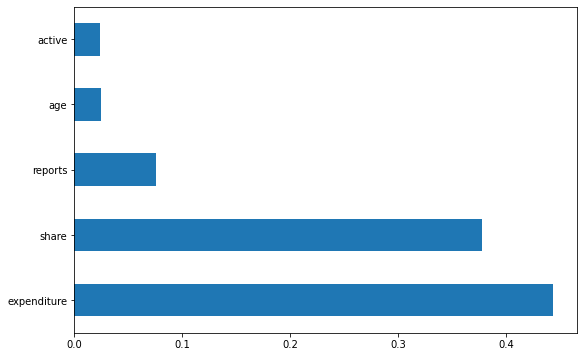

In [12]:
#Feature Importance
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind = 'barh',
                            figsize = (9,6))

#Parameter Tuning

In [13]:
#Parameter grid
from sklearn.model_selection import ParameterGrid
param_grid = {'n_estimators': range(50,500, 50)}
grid = ParameterGrid(param_grid)
grid[1]

{'n_estimators': 100}

In [14]:
#Parameter Tuning

#List where to store the results
f1score = []

#Loop
for params in grid:

  #build the model
  model = RandomForestClassifier(n_estimators= params['n_estimators'],
                                 random_state = 1502)
  model.fit(X_train, y_train)
  
  #Predictions
  predictions = model.predict(X_test)

  #accuracy assessment
  f1 = f1_score(y_test, predictions)

  #store the results
  f1score.append(f1)

In [15]:
#Best Parameters
best_params = grid[np.argmax(f1)]
print(best_params)

{'n_estimators': 50}
